# Setting Source Folder

In [1]:
import os, sys


filedir = os.path.abspath(".")

currentdir = os.path.dirname(os.path.abspath(".")) # workaround to adding local modules

parentdir = os.path.dirname(os.path.abspath(""+currentdir))
print(f'CurrentDir: {currentdir}')
print(f'ParentDir: {parentdir}')

sys.path.insert(0, currentdir)

CurrentDir: /Users/renan.cristofalo/Documents/git/multimorbity_use
ParentDir: /Users/renan.cristofalo/Documents/git


# Installing Libraries

In [2]:
# !pip install -r requirements.txt

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os.path as osp
import seaborn as sns
import matplotlib.pyplot as plt

from src.visualization.data_visualization import plot, heat_map_corr
from src.utils.utils import time_diff_str, now, now_str
from src.config import *

# from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

# Definitions

In [4]:
DATA_PATH = osp.join('..', 'data', 'processed','dataset_clean.csv')
TARGET = 'pronto_atendimento'

In [5]:
pdf = pd.read_csv(DATA_PATH)
pdf.sample(10)

setor                              nmor  \
1471        431440705180064 - AREAL                                 5   
2568   431440705200028, SÃO GONÇALO  1 (apenas o próprio respondente)   
2970      431440705150081 - FRAGATA                                 5   
1456       431440705160023 - CENTRO  1 (apenas o próprio respondente)   
2379       431440705150017, FRAGATA  1 (apenas o próprio respondente)   
1231        431440705180012 - AREAL                                 2   
1809  431440705130073 - TRÊS VENDAS                                 4   
2396       431440705150080, FRAGATA                                 3   
2034        431440705180072 - AREAL                                 4   
3393        431440705160059, CENTRO                                 2   

                    genero     cor  ler  \
1471  Mulher cisgênera (1)  Branca  sim   
2568  Mulher cisgênera (1)   Preta  sim   
2970  Mulher cisgênera (1)   Preta  sim   
1456  Mulher cisgênera (1)  Branca  sim   
2379   Homem cisgênero (1)   Preta  sim   
1231  Mulher cisgênera (1)  Branca  sim   
1809  Mulher cisgênera (1)   Parda  sim   
2396  Mulher cisgênera (1)  Branca  sim   
2034  Mulher cisgênera (1)   Preta  sim   
3393   Homem cisgênero (1)  Branca  sim   

                                                  escol  \
1471                                6º série do 1º grau   
2568  3º série do 2º grau (antigo colegial: clássico...   
2970                                Superior incompleto   
1456                                  Superior completo   
2379  3º série do 2º grau (antigo colegial: clássico...   
1231                                  Superior completo   
1809                                5º série do 1º grau   
2396     4º série do 1º grau (antigo primário ou grupo)   
2034               8º série do 1º grau (antigo ginásio)   
3393                   Especialização/residência médica   

                          sit  altura   peso  \
1471                   Do lar  157.00  67.00   
2568            Aposentado(a)  150.00  70.00   
2970                Estudando  167.00  60.00   
1456  Trabalhando e estudando  165.00  90.00   
2379            Aposentado(a)  171.00  84.00   
1231  Trabalhando e estudando  170.00  84.00   
1809          Desempregado(a)  160.00  73.00   
2396            Aposentado(a)  158.00  73.00   
2034             Outro, qual?  168.00  60.00   
3393              Trabalhando  175.00 105.00   

                                   conj trab           rendapd  \
1471    casado(a) ou com companheiro(a)  não  Permaneceu igual   
2568                        separado(a)  não  Permaneceu igual   
2970                        separado(a)  não   Piorou um pouco   
1456  solteiro(a) ou sem companheiro(a)  sim   Piorou um pouco   
2379                        separado(a)  não  Permaneceu igual   
1231    casado(a) ou com companheiro(a)  sim          Melhorou   
1809  solteiro(a) ou sem companheiro(a)  não   Piorou um pouco   
2396                           viúvo(a)  não  Permaneceu igual   
2034                        separado(a)  não      Piorou muito   
3393    casado(a) ou com companheiro(a)  sim   Piorou um pouco   

                              fumo  tafumo  tmfumo  tpafumo tpmfumo  cigdia  \
1471              não, nunca fumou     NaN     NaN      NaN     NaN     NaN   
2568              não, nunca fumou     NaN     NaN      NaN     NaN     NaN   
2970                           sim     NaN     NaN    25.00       0   10.00   
1456                           sim     NaN     NaN    15.00       0    3.00   
2379              não, nunca fumou     NaN     NaN      NaN     NaN     NaN   
1231  já fumou, mas parou de fumar    0.00    8.00    16.00       0   10.00   
1809              não, nunca fumou     NaN     NaN      NaN     NaN     NaN   
2396  já fumou, mas parou de fumar   36.00    0.00    20.00       0   20.00   
2034              não, nunca fumou     NaN     NaN      NaN     NaN     NaN   
3393              não, nunca fumou     NaN     NaN      

In [6]:
pdf[morbidades + ['multi_calc']].sample(10)

ost  art  has diab pcor park  rin tire glau  cat alzh  inc hepat  dor  \
53    Não  Não  Sim  Não  Não  Não  Não  Não  Não  Não  Não  Não   Não  Não   
51    Não  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não   Não  Não   
1032  Não  Não  Sim  Não  Não  Não  Não  Não  Não  Não  Não  Não   Não  Não   
867   Não  Não  Não  Sim  Não  Não  Sim  Não  Não  Não  Não  Não   Não  Não   
2419  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não   Não  Não   
605   Não  Não  Não  Não  Não  Não  Não  Sim  Não  Não  Não  Não   Não  Não   
649   Não  Não  Sim  Não  Não  Não  Não  Não  Não  Não  Não  Não   Não  Não   
2295  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não  Não   Não  Não   
1265  Não  Não  Sim  Sim  Não  Não  Não  Sim  Não  Não  Não  Não   Não  Sim   
2145  Não  Sim  Sim  Não  Não  Não  Não  Não  Não  Sim  Não  Não   Não  Não   

      out  cancer dpoc enfs pros  asm  brq  multi_calc  
53    Não    0.00  Não  Não  Não  Não  Não           1  
51    Não    0.00  Não  Não  Não  Não  Não           0  
1032  Não    0.00  Não  Não  Não  Não  Não           1  
867   Não    0.00  Não  Não  Não  Não  Não           2  
2419  Não    0.00  Não  Não  Não  Não  Não           0  
605   Não    0.00  Não  Não  Não  Não  Não           1  
649   Não    0.00  Não  Não  Não  Sim  Não           2  
2295  Não    0.00  Não  Não  Não  Não  Não           0  
1265  Sim    0.00  Não  Não  Não  Não  Não           5  
2145  Não    0.00  Não  Não  Não  Não  Não           3

In [7]:
pdf.shape

(3492, 382)

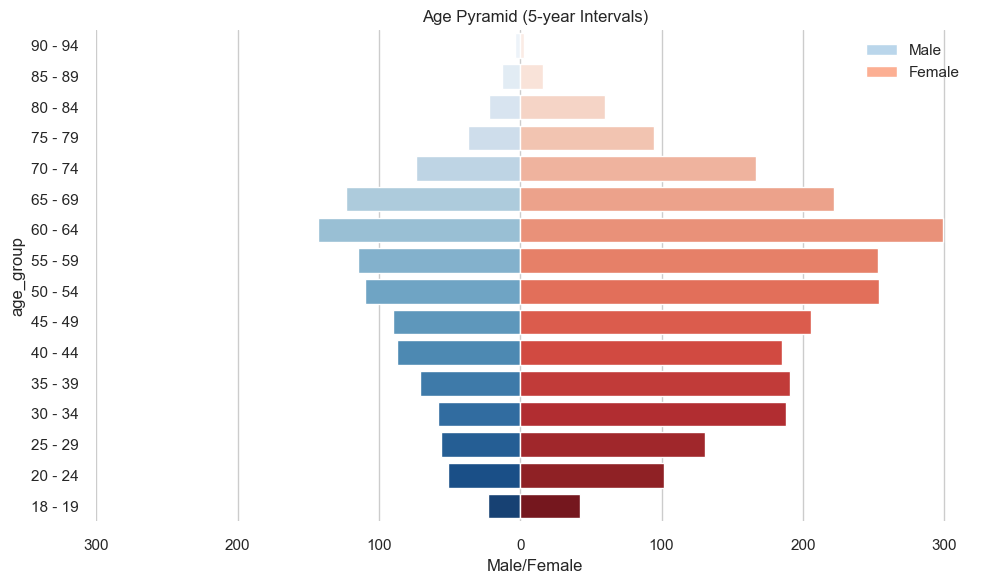

In [8]:
# Age Pyramid

# Bin the age groups in 5-year intervals
pdf['age_group'] = pd.cut(pdf['idade'], bins=np.arange(15, 100, 5), right=False)

pyramid_df = pdf.copy()

pyramid_df = pyramid_df.dropna(subset=['age_group'])

# Reverse the order of age groups
age_labels = sorted(pyramid_df['age_group'].unique(), reverse = True)
pyramid_df['age_group'] = pd.Categorical(pyramid_df['age_group'], categories=age_labels, ordered=True)

# Calculate population counts for each age group and gender
df_counts = pyramid_df.groupby(['age_group', 'sexj']).size().reset_index(name='Population')

# Pivot the data to create separate columns for male and female populations
df_pivot = df_counts.pivot(index='age_group', columns='sexj', values='Population').reset_index()

df_pivot['male'] = df_pivot['male'] * -1

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))

ax1 = sns.barplot(x='male', y='age_group', data=df_pivot, palette='Blues', ax=ax)
ax2 = sns.barplot(x='female', y='age_group', data=df_pivot, palette='Reds', ax=ax)

# Create custom legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Blues')[1]),
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Reds')[1])
]

# Add legend
ax.legend(custom_legend, ['Male', 'Female'], loc='upper right')

ax.set_title("Age Pyramid (5-year Intervals)")
ax.set_xlabel("Male/Female")

ax.set_xticks(ticks=[-300, -200, -100, 0, 100, 200, 300])
ax.set_xticklabels(labels=[300, 200, 100, 0, 100, 200, 300])

ax.set_yticks(np.arange(len(df_pivot['age_group'])))
ax.set_yticklabels([f"{age.left} - {age.right-1}" for age in df_pivot['age_group'][:-1]]  + ['18 - 19'], rotation=0)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

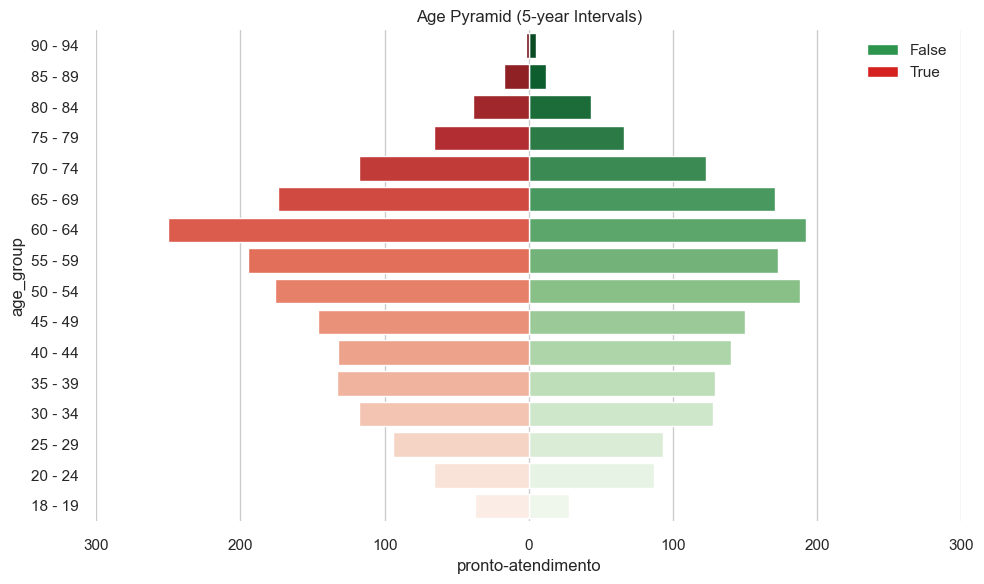

In [9]:
# Age Pyramid

# Bin the age groups in 5-year intervals
pdf['age_group'] = pd.cut(pdf['idade'], bins=np.arange(15, 100, 5), right=False)

pyramid_df = pdf.copy()

pyramid_df = pyramid_df.dropna(subset=['age_group'])

# Reverse the order of age groups
age_labels = sorted(pyramid_df['age_group'].unique(), reverse = True)
pyramid_df['age_group'] = pd.Categorical(pyramid_df['age_group'], categories=age_labels, ordered=True)

# Calculate population counts for each age group and gender
df_counts = pyramid_df.groupby(['age_group', TARGET]).size().reset_index(name='Population')

# Pivot the data to create separate columns for male and female populations
df_pivot = df_counts.pivot(index='age_group', columns=TARGET, values='Population').reset_index()

df_pivot[0] = df_pivot[0] * -1

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))

ax1 = sns.barplot(x=1, y='age_group', data=df_pivot, palette='Greens_r', ax=ax)
ax2 = sns.barplot(x=0, y='age_group', data=df_pivot, palette='Reds_r', ax=ax)

# Create custom legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Greens_r')[1]),
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Reds_r')[1])
]

# Add legend
ax.legend(custom_legend, ['False', 'True'], loc='upper right')

ax.set_title("Age Pyramid (5-year Intervals)")
ax.set_xlabel("pronto-atendimento")

ax.set_xticks(ticks=[-300, -200, -100, 0, 100, 200, 300])
ax.set_xticklabels(labels=[300, 200, 100, 0, 100, 200, 300])

ax.set_yticks(np.arange(len(df_pivot['age_group'])))
ax.set_yticklabels([f"{age.left} - {age.right-1}" for age in df_pivot['age_group'][:-1]]  + ['18 - 19'], rotation=0)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

In [10]:
df_pivot

pronto_atendimento age_group    0    1
0                   [90, 95)   -2    5
1                   [85, 90)  -17   12
2                   [80, 85)  -39   43
3                   [75, 80)  -66   66
4                   [70, 75) -118  123
5                   [65, 70) -174  171
6                   [60, 65) -250  192
7                   [55, 60) -195  173
8                   [50, 55) -176  188
9                   [45, 50) -146  150
10                  [40, 45) -132  140
11                  [35, 40) -133  129
12                  [30, 35) -118  128
13                  [25, 30)  -94   93
14                  [20, 25)  -66   87
15                  [15, 20)  -37   28

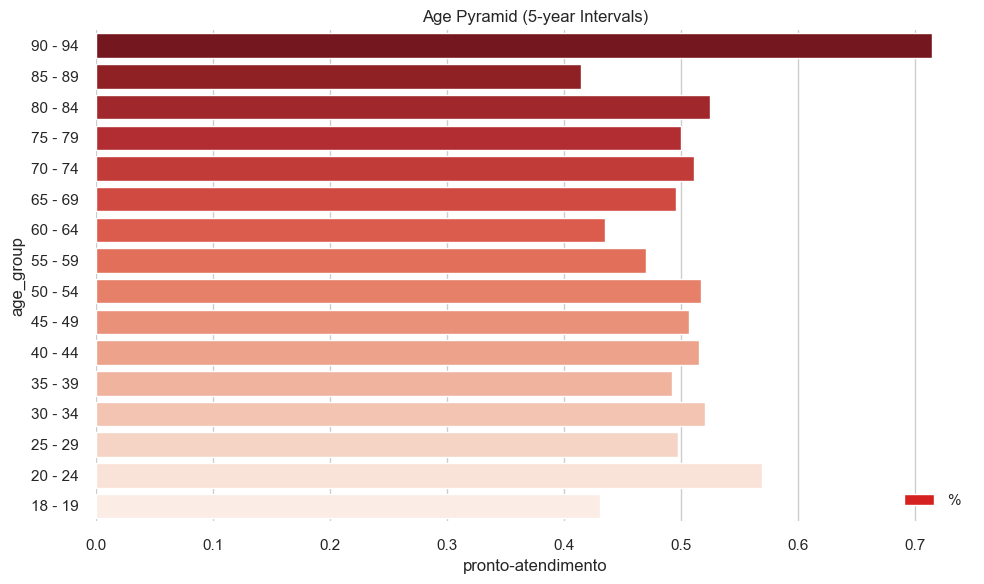

In [11]:
# Age Pyramid

# Bin the age groups in 5-year intervals
pdf['age_group'] = pd.cut(pdf['idade'], bins=np.arange(15, 100, 5), right=False)

pyramid_df = pdf.copy()

pyramid_df = pyramid_df.dropna(subset=['age_group'])

# Reverse the order of age groups
age_labels = sorted(pyramid_df['age_group'].unique(), reverse = True)
pyramid_df['age_group'] = pd.Categorical(pyramid_df['age_group'], categories=age_labels, ordered=True)

# Calculate population counts for each age group and gender
df_counts = pyramid_df.groupby(['age_group', TARGET]).size().reset_index(name='Population')

# Pivot the data to create separate columns for male and female populations
df_pivot = df_counts.pivot(index='age_group', columns=TARGET, values='Population').reset_index()

df_pivot['pct'] = df_pivot[1]/(df_pivot[0] + df_pivot[1])

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))

ax1 = sns.barplot(x='pct', y='age_group', data=df_pivot, palette='Reds_r', ax=ax)


# Create custom legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Reds_r')[1]),
]

# Add legend
ax.legend(custom_legend, ['%', 'True'], loc='lower right')

ax.set_title("Age Pyramid (5-year Intervals)")
ax.set_xlabel("pronto-atendimento")

# ax.set_xticks(ticks=[-300, -200, -100, 0, 100, 200, 300])
# ax.set_xticklabels(labels=[300, 200, 100, 0, 100, 200, 300])

ax.set_yticks(np.arange(len(df_pivot['age_group'])))
ax.set_yticklabels([f"{age.left} - {age.right-1}" for age in df_pivot['age_group'][:-1]]  + ['18 - 19'], rotation=0)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

In [12]:
pdf['multi_calc_adjust'] = pdf['multi_calc'].apply(lambda x: str(x) if x<=7 else '>7')
pdf['multi_calc_adjust_2'] = pdf['multi_calc'].apply(lambda x: str(x) if x<=8 else '>8')

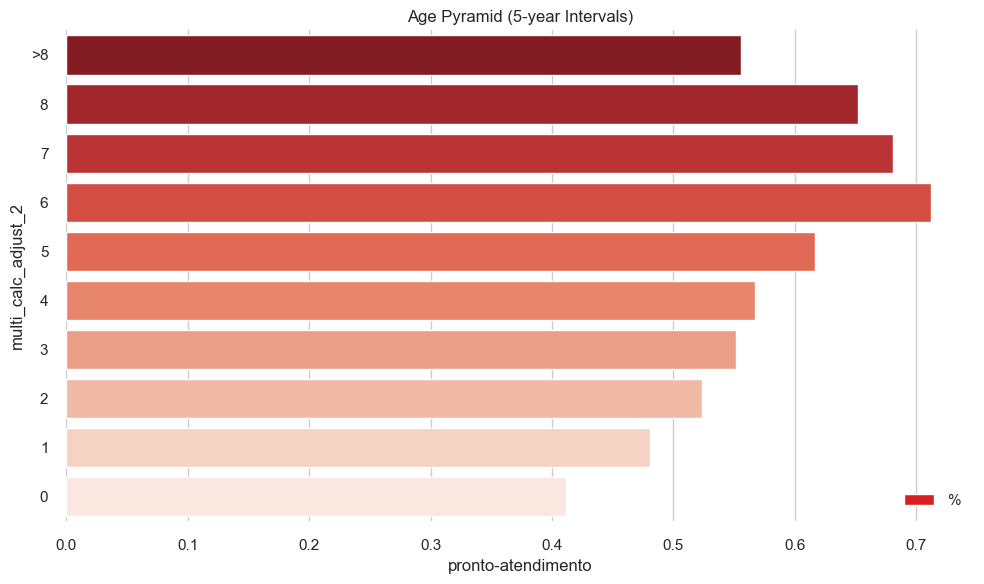

In [13]:
# Age Pyramid

# Bin the age groups in 5-year intervals
# pdf['multi_calc_adjust_2'] = pd.cut(pdf['idade'], bins=np.arange(15, 100, 5), right=False)

pyramid_df = pdf.copy()

pyramid_df = pyramid_df.dropna(subset=['multi_calc_adjust_2'])

# Reverse the order of age groups
age_labels = sorted(pyramid_df['multi_calc_adjust_2'].unique(), reverse = True)
pyramid_df['multi_calc_adjust_2'] = pd.Categorical(pyramid_df['multi_calc_adjust_2'], categories=age_labels, ordered=True)

# Calculate population counts for each age group and gender
df_counts = pyramid_df.groupby(['multi_calc_adjust_2', TARGET]).size().reset_index(name='Population')

# Pivot the data to create separate columns for male and female populations
df_pivot = df_counts.pivot(index='multi_calc_adjust_2', columns=TARGET, values='Population').reset_index()

df_pivot['pct'] = df_pivot[1]/(df_pivot[0] + df_pivot[1])

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))

ax1 = sns.barplot(x='pct', y='multi_calc_adjust_2', data=df_pivot, palette='Reds_r', ax=ax)


# Create custom legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Reds_r')[1]),
]

# Add legend
ax.legend(custom_legend, ['%', 'True'], loc='lower right')

ax.set_title("Age Pyramid (5-year Intervals)")
ax.set_xlabel("pronto-atendimento")

# ax.set_xticks(ticks=[-300, -200, -100, 0, 100, 200, 300])
# ax.set_xticklabels(labels=[300, 200, 100, 0, 100, 200, 300])

# ax.set_yticks(np.arange(len(df_pivot['multi_calc_adjust_2'])))
# ax.set_yticklabels([f"{age.left} - {age.right-1}" for age in df_pivot['multi_calc_adjust_2'][:-1]]  + ['18 - 19'], rotation=0)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

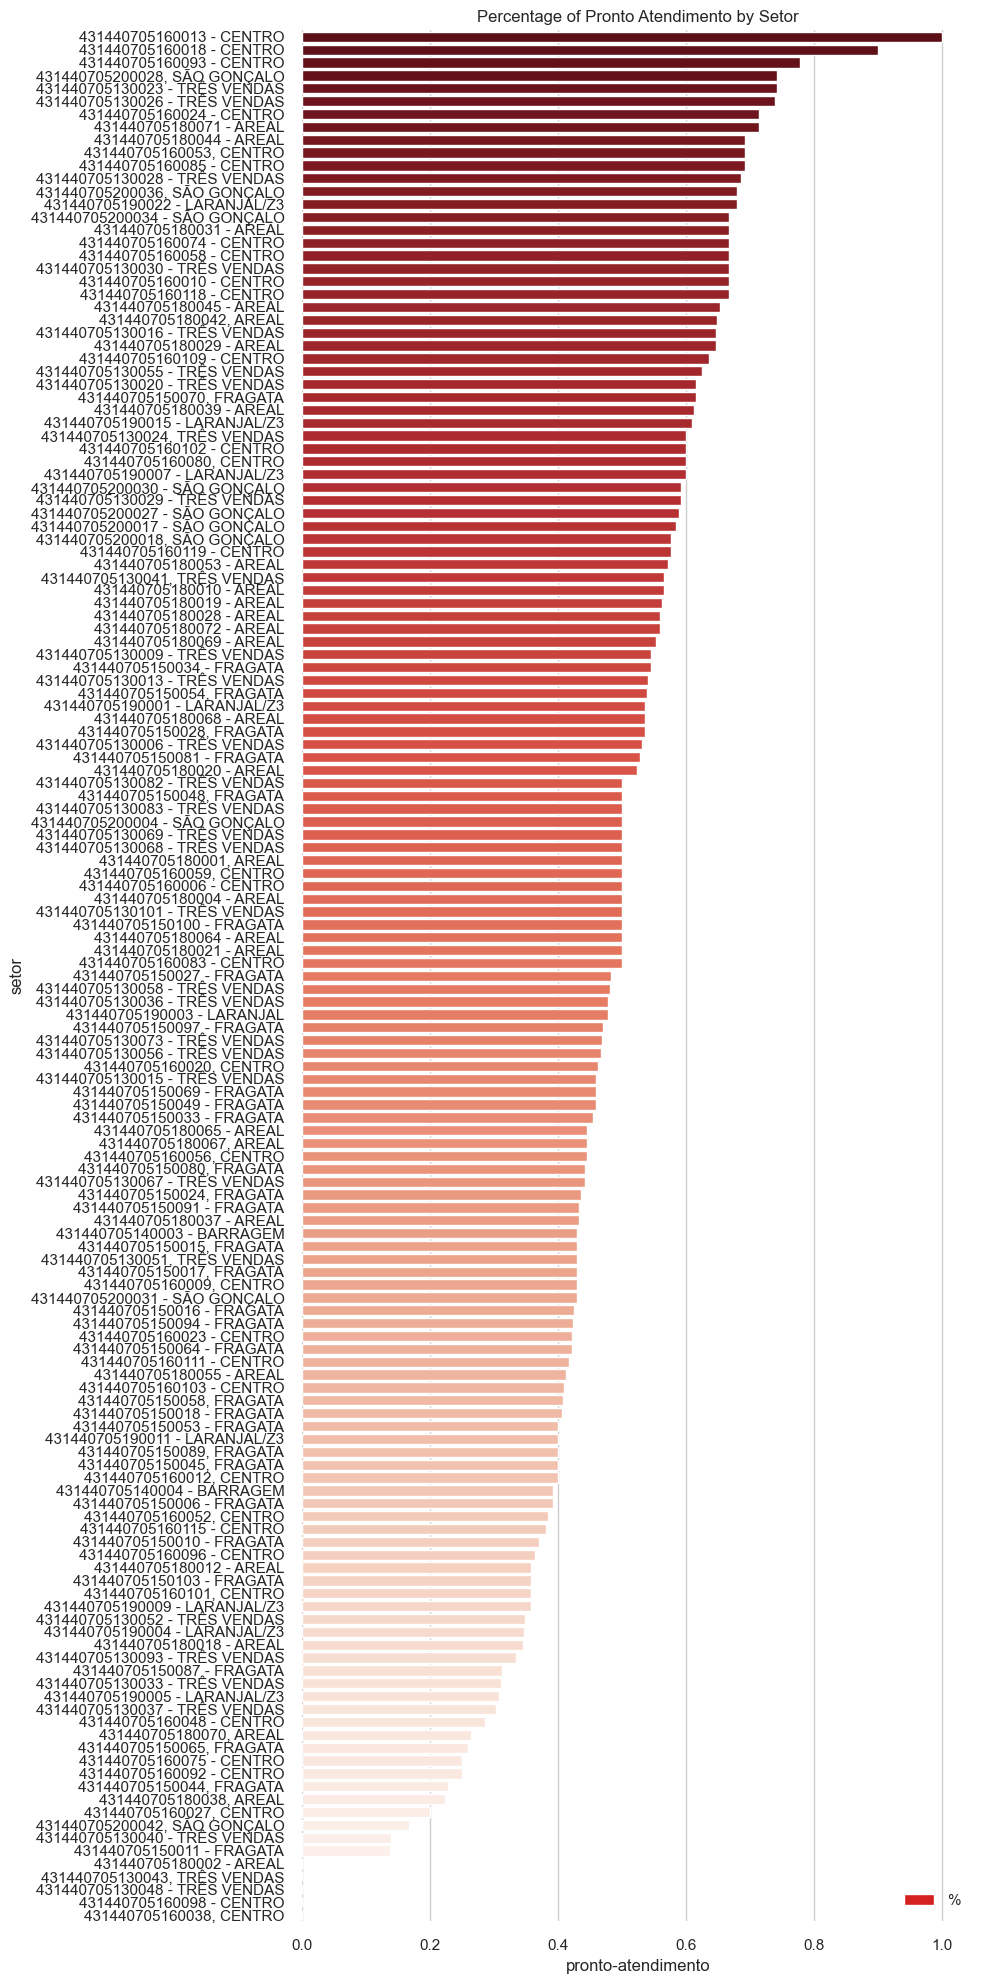

In [14]:
pyramid_df = pdf.copy()

pyramid_df = pyramid_df.dropna(subset=['setor'])

# Reverse the order of age groups
age_labels = sorted(pyramid_df['setor'].unique(), reverse = True)
pyramid_df['setor'] = pd.Categorical(pyramid_df['setor'], categories=age_labels, ordered=True)

# Calculate population counts for each age group and gender
df_counts = pyramid_df.groupby(['setor', TARGET]).size().reset_index(name='Population')

# Pivot the data to create separate columns for male and female populations
df_pivot = df_counts.pivot(index='setor', columns=TARGET, values='Population').reset_index()

df_pivot['pct'] = df_pivot[1]/(df_pivot[0] + df_pivot[1])

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 20))

ax1 = sns.barplot(x='pct', y='setor', data=df_pivot, palette='Reds_r', ax=ax, order=df_pivot.sort_values(by='pct',ascending=False)['setor'])

# Create custom legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Reds_r')[1]),
]

# Add legend
ax.legend(custom_legend, ['%', 'True'], loc='lower right')

ax.set_title("Percentage of Pronto Atendimento by Setor")
ax.set_xlabel("pronto-atendimento")

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

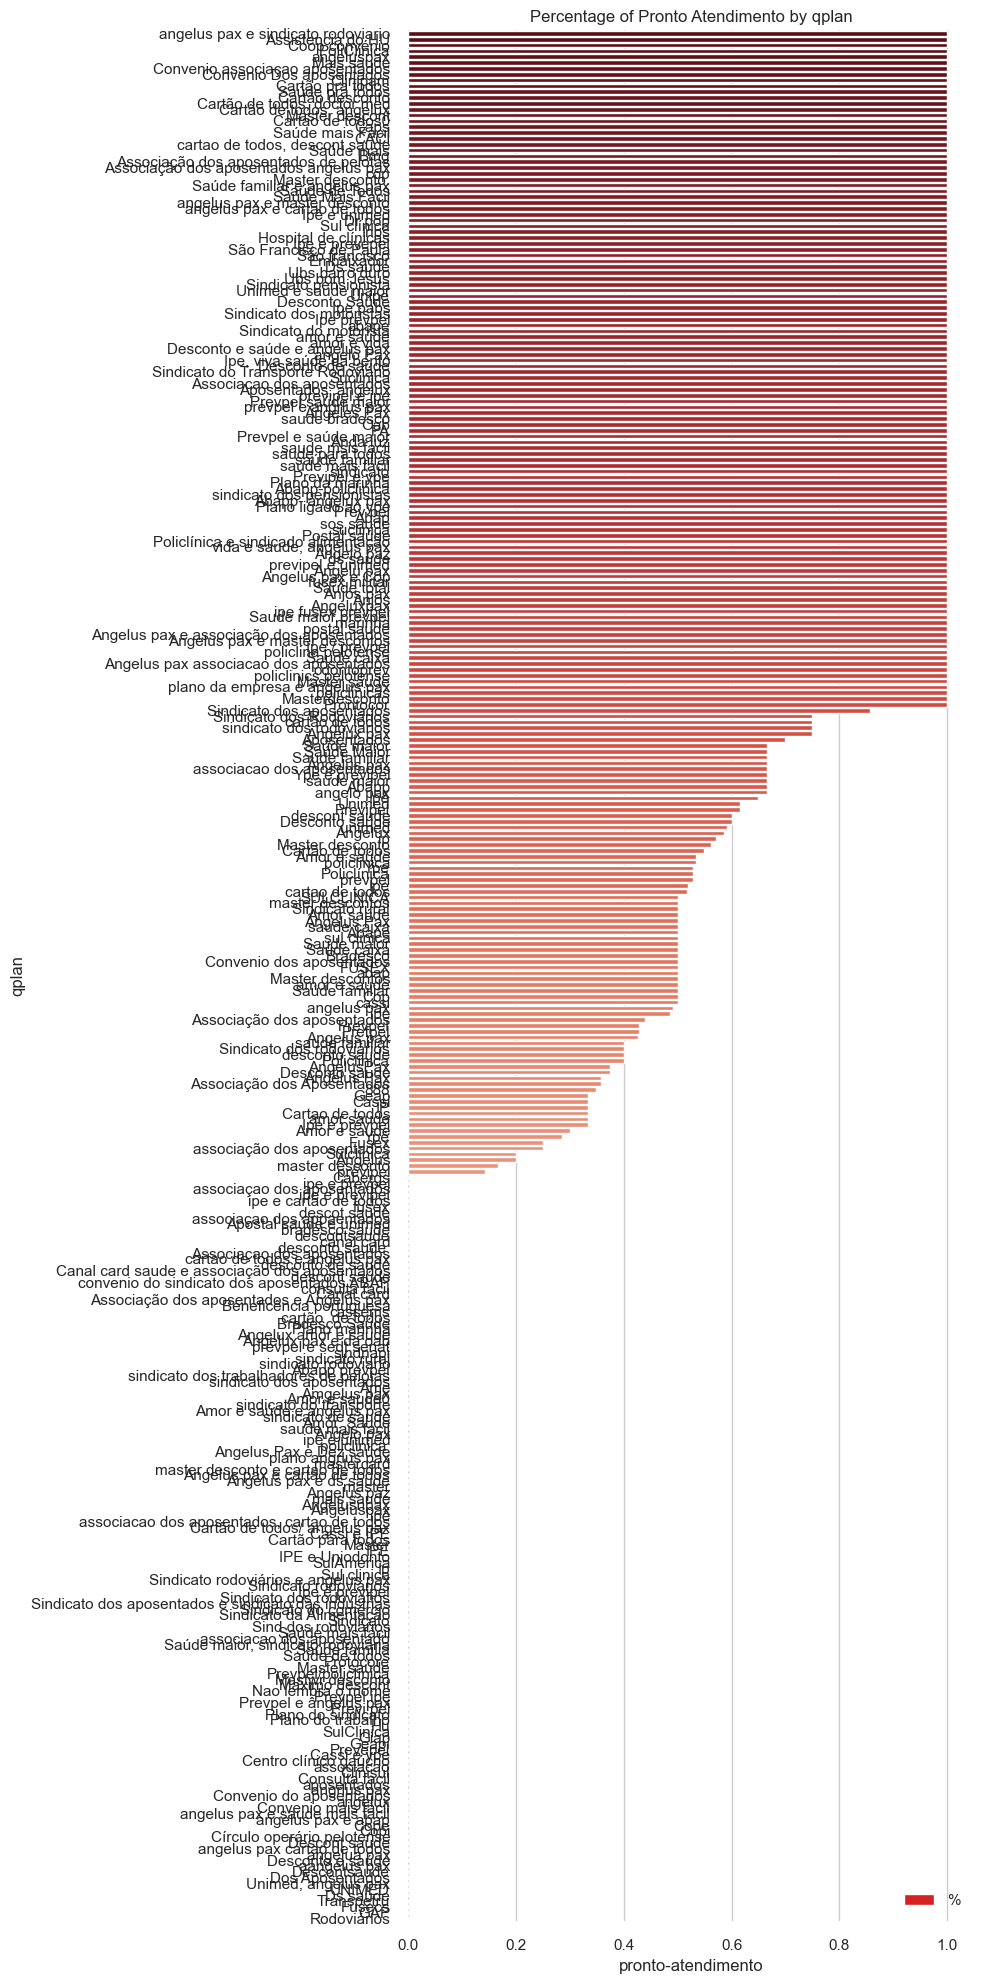

In [15]:
pyramid_df = pdf.copy()

pyramid_df = pyramid_df.dropna(subset=['qplan'])

# Reverse the order of age groups
age_labels = sorted(pyramid_df['qplan'].unique(), reverse = True)
pyramid_df['qplan'] = pd.Categorical(pyramid_df['qplan'], categories=age_labels, ordered=True)

# Calculate population counts for each age group and gender
df_counts = pyramid_df.groupby(['qplan', TARGET]).size().reset_index(name='Population')

# Pivot the data to create separate columns for male and female populations
df_pivot = df_counts.pivot(index='qplan', columns=TARGET, values='Population').reset_index()

df_pivot['pct'] = df_pivot[1]/(df_pivot[0] + df_pivot[1])

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 20))

ax1 = sns.barplot(x='pct', y='qplan', data=df_pivot, palette='Reds_r', ax=ax, order=df_pivot.sort_values(by='pct',ascending=False)['qplan'])

# Create custom legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Reds_r')[1]),
]

# Add legend
ax.legend(custom_legend, ['%', 'True'], loc='lower right')

ax.set_title("Percentage of Pronto Atendimento by qplan")
ax.set_xlabel("pronto-atendimento")

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

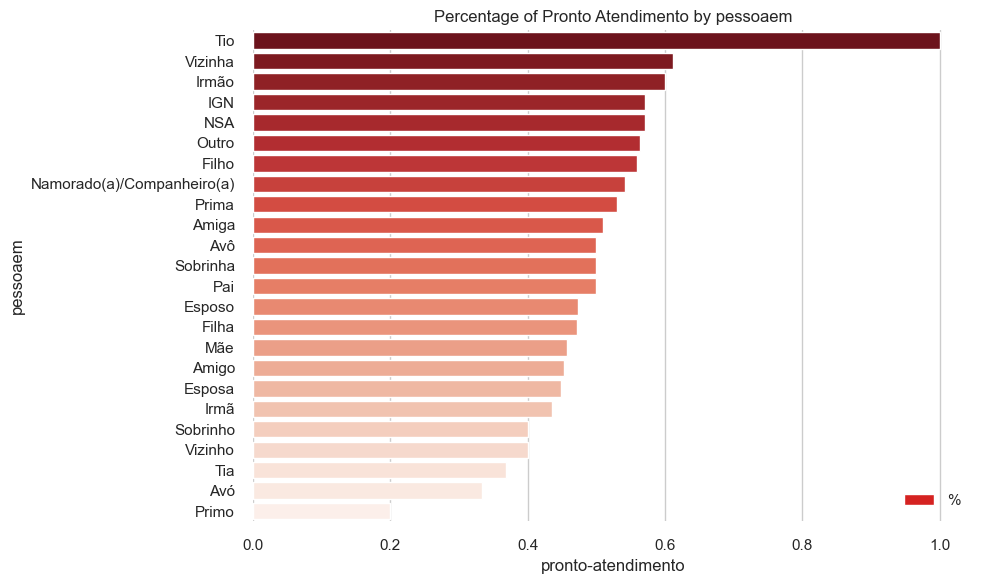

In [16]:
pyramid_df = pdf.copy()

pyramid_df = pyramid_df.dropna(subset=['pessoaem'])

# Reverse the order of age groups
age_labels = sorted(pyramid_df['pessoaem'].unique(), reverse = True)
pyramid_df['pessoaem'] = pd.Categorical(pyramid_df['pessoaem'], categories=age_labels, ordered=True)

# Calculate population counts for each age group and gender
df_counts = pyramid_df.groupby(['pessoaem', TARGET]).size().reset_index(name='Population')

# Pivot the data to create separate columns for male and female populations
df_pivot = df_counts.pivot(index='pessoaem', columns=TARGET, values='Population').reset_index()

df_pivot['pct'] = df_pivot[1]/(df_pivot[0] + df_pivot[1])

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))

ax1 = sns.barplot(x='pct', y='pessoaem', data=df_pivot, palette='Reds_r', ax=ax, order=df_pivot.sort_values(by='pct',ascending=False)['pessoaem'])

# Create custom legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette('Reds_r')[1]),
]

# Add legend
ax.legend(custom_legend, ['%', 'True'], loc='lower right')

ax.set_title("Percentage of Pronto Atendimento by pessoaem")
ax.set_xlabel("pronto-atendimento")

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

In [17]:
df_pivot.sort_values(by=1,ascending=False)

pronto_atendimento                    pessoaem    0    1  pct
18                                      Esposo  258  232 0.47
19                                      Esposa  247  201 0.45
23                                       Amiga  189  197 0.51
17                                       Filha  219  196 0.47
16                                       Filho  125  159 0.56
11                                         NSA  112  149 0.57
9                                        Outro   99  128 0.56
12                                         Mãe  151  127 0.46
14                                        Irmã  131  101 0.44
22                                       Amigo   75   62 0.45
10                  Namorado(a)/Companheiro(a)   38   45 0.54
1                                      Vizinha   19   30 0.61
13                                       Irmão   20   30 0.60
8                                          Pai   16   16 0.50
15                                         IGN   12   16 0.57
5                                     Sobrinha   10   10 0.50
7                                        Prima    8    9 0.53
3                                          Tia   12    7 0.37
0                                      Vizinho    9    6 0.40
4                                     Sobrinho    3    2 0.40
2                                          Tio    0    2 1.00
6                                        Primo    4    1 0.20
20                                         Avô    1    1 0.50
21                                         Avó    2    1 0.33

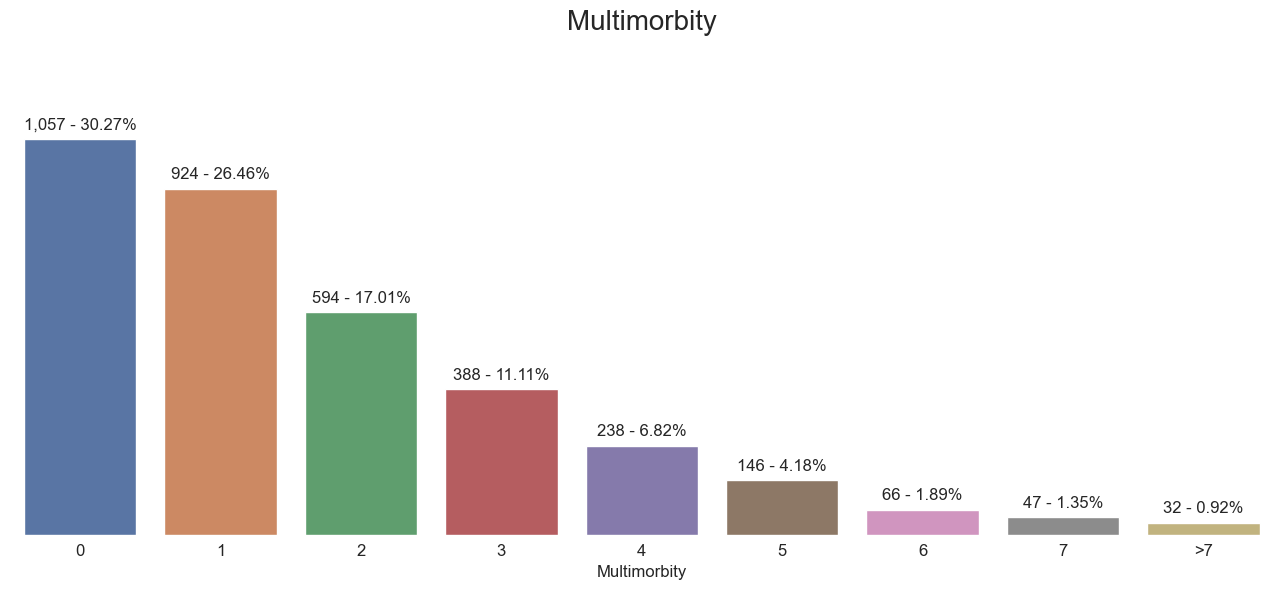

In [18]:
plt.style.use("seaborn-white")  

fig, ax = plot(
    function='countplot',
    df=pdf,
    columns=['multi_calc_adjust'],
    title='Multimorbity',
    subtitles = None,
    title_fontsize = 20,
    ncols=1,
    plot_size=(13,6),
    ha="center",
    rotation = 0
    )

ax.set_xticklabels(ax.get_xticklabels(),rotation=0, rotation_mode="anchor", ha='center')
ax.set_xlabel("Multimorbity")

ax.set_yticks([])
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

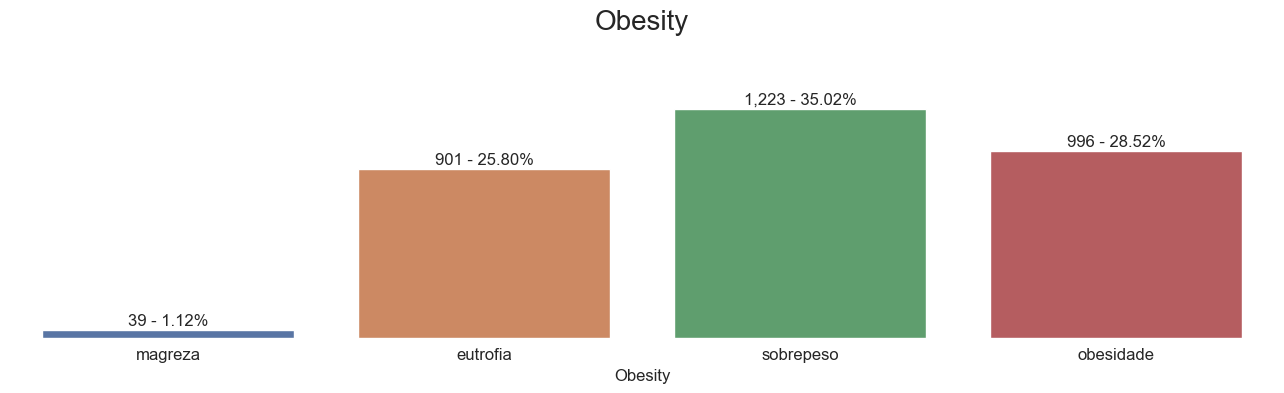

In [19]:
plt.style.use("seaborn-white")  

fig, ax = plot(
    function='countplot',
    df=pdf,
    columns=['bmi4cat'],
    title='Obesity',
    subtitles = None,
    title_fontsize = 20,
    ncols=1,
    plot_size=(13,4), 
    order = ['magreza', 'eutrofia', 'sobrepeso','obesidade'],
    rotation = 0
    )

ax.set_xticklabels(ax.get_xticklabels(),rotation=0, rotation_mode="anchor", ha='center')
ax.set_xlabel("Obesity")

ax.set_yticks([])
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

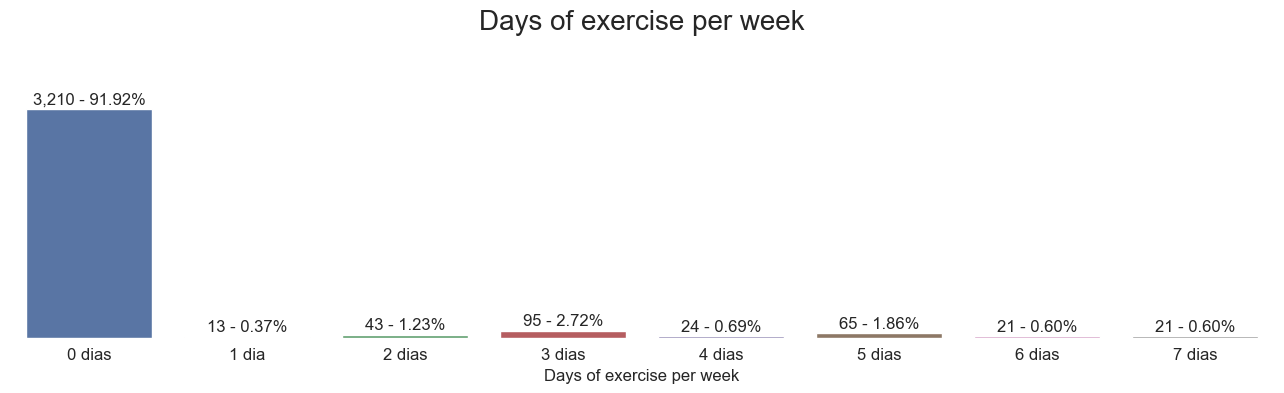

In [20]:
plt.style.use("seaborn-white")  

fig, ax = plot(
    function='countplot',
    df=pdf[['exert']].fillna('0 dias'),
    columns=['exert'],
    title='Days of exercise per week',
    subtitles = None,
    title_fontsize = 20,
    ncols=1,
    plot_size=(13,4), 
    order = ['0 dias', '1 dia', '2 dias', '3 dias', '4 dias', '5 dias', '6 dias', '7 dias'],
    rotation = 0
    )

ax.set_xticklabels(ax.get_xticklabels(),rotation=0, rotation_mode="anchor", ha='center')
ax.set_xlabel("Days of exercise per week")

ax.set_yticks([])
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

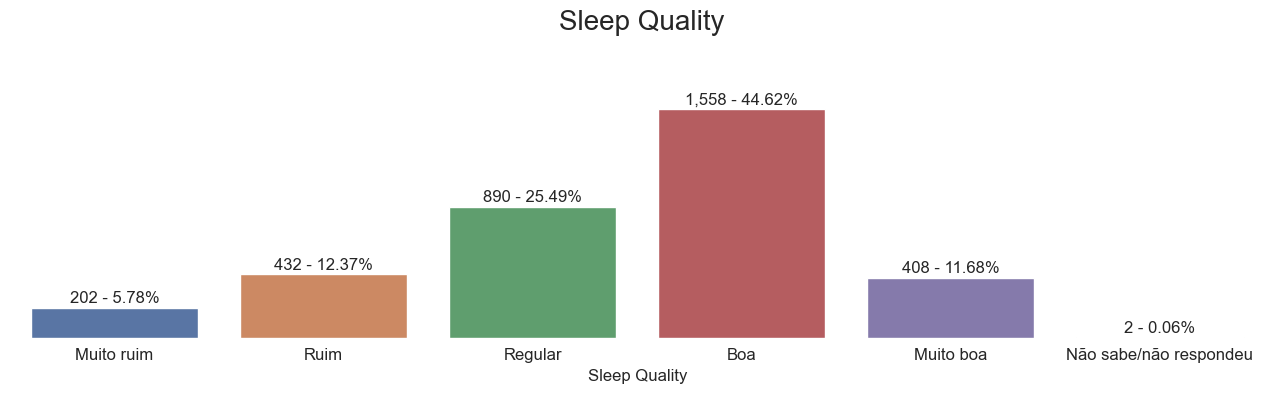

In [21]:
plt.style.use("seaborn-white")  

fig, ax = plot(
    function='countplot',
    df=pdf,
    columns=['qsono'],
    title='Sleep Quality',
    subtitles = None,
    title_fontsize = 20,
    ncols=1,
    plot_size=(13,4), 
    order = ['Muito ruim','Ruim', 'Regular', 'Boa','Muito boa', 'Não sabe/não respondeu'],
    rotation = 0
    )

ax.set_xticklabels(ax.get_xticklabels(),rotation=0, rotation_mode="anchor", ha='center')
ax.set_xlabel("Sleep Quality")

ax.set_yticks([])
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='bmi', ylabel='Density'>

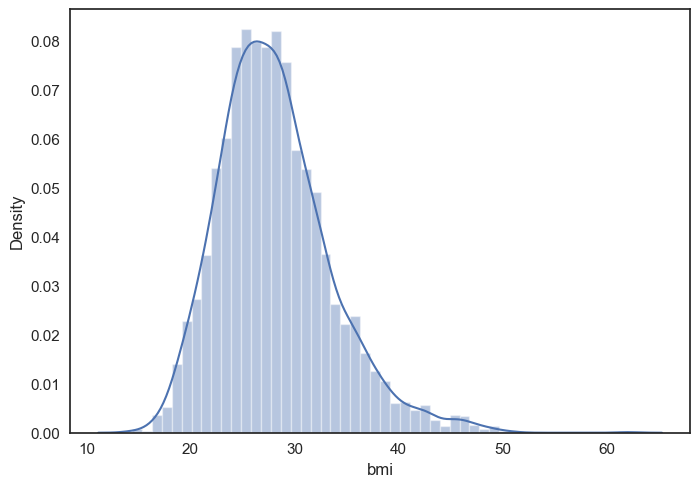

In [22]:
sns.distplot(pdf.dropna(subset=['bmi'])['bmi'])

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot: title={'center': 'bmi'}, xlabel='bmi', ylabel='Count'>)

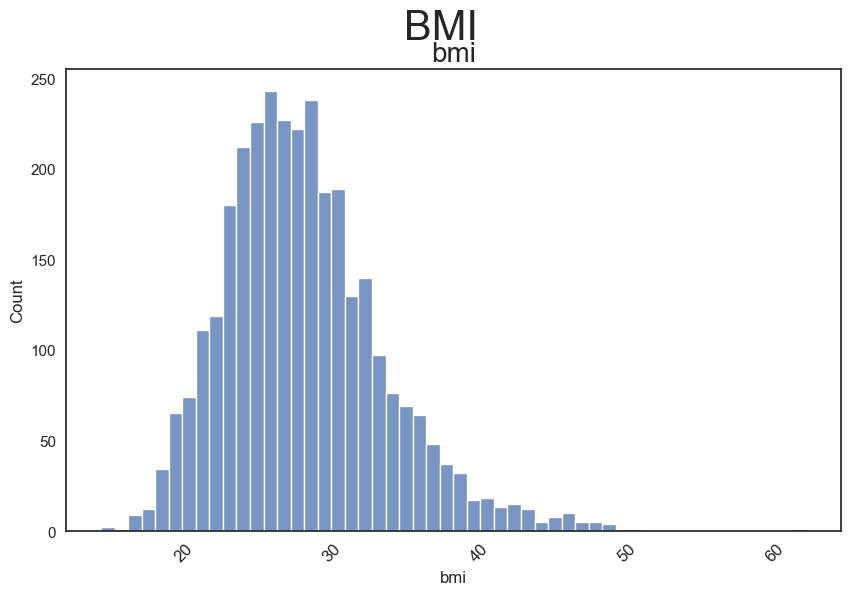

In [23]:
plot(function='histplot', df=pdf.dropna(subset=['bmi']), columns=['bmi'], title='BMI', ncols=1)

<AxesSubplot: >

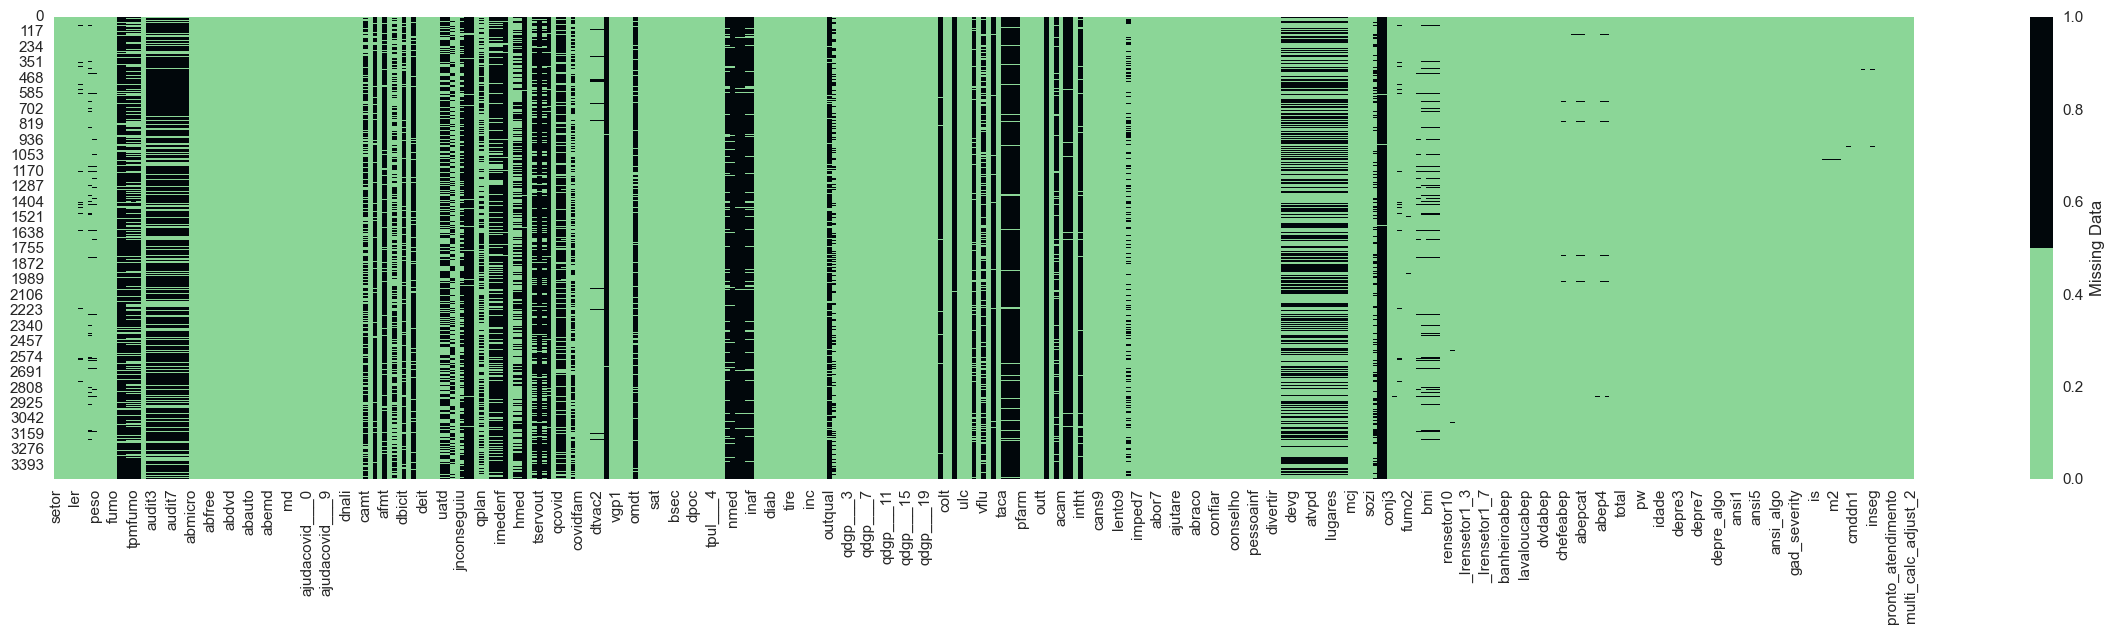

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,6))
sns.heatmap(pdf.isna(),
            cmap=sns.cubehelix_palette(2,start=.45, rot=-1.75, gamma=2, hue=1.25),
            cbar_kws={'label': 'Missing Data'}, )

In [25]:

categorical_features=pdf.select_dtypes(object).columns.to_list()

numeric_features = list(set(pdf.columns) - set (categorical_features) - set([TARGET]))
# numeric_features.remove(TARGET)

selected_features = set(categorical_features + numeric_features + [TARGET])

# Reading Dataset

In [26]:
pdf[categorical_features]= pdf[categorical_features].astype(object)

In [27]:
# Select only the columns that are needed
pdf = pdf[selected_features]

In [28]:
pdf.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 385 columns):
 #    Column               Dtype   
---   ------               -----   
 0    cor4                 object  
 1    qdgp___15            object  
 2    dvdabep              float64 
 3    dnali                object  
 4    peso1                float64 
 5    jnondebuscou         object  
 6    abgel                object  
 7    taca                 float64 
 8    pronto_atendimento   int64   
 9    pessoamt             object  
 10   park                 object  
 11   ansi6                float64 
 12   escol                object  
 13   depre5               float64 
 14   pw1                  float64 
 15   autsa                object  
 16   afm                  object  
 17   devg                 object  
 18   tpul___3             object  
 19   pessoaem             object  
 20   tpafumo              float64 
 21   tratcovid            object  
 22   jnbuscou             o

In [29]:
(pdf.isnull().sum()*100/len(pdf)).sort_values()

abag              0.00
ajudacovid___2    0.00
qdgp___19         0.00
sent              0.00
qdgp___13         0.00
                  ... 
hmedout          99.28
mvacout          99.48
qoutt            99.48
idag             99.51
qserv            99.51
Length: 385, dtype: float64

In [30]:
pdf.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9]).T

count  mean    std   min   10%   20%   30%   40%   50%  \
dvdabep            3,492.00  0.17   0.45  0.00  0.00  0.00  0.00  0.00  0.00   
peso1              3,325.00 75.56  15.97 35.00 57.00 62.00 66.00 70.00 74.00   
taca                 165.00 21.63 156.34  0.00  1.00  2.00  3.00  4.00  6.00   
pronto_atendimento 3,492.00  0.49   0.50  0.00  0.00  0.00  0.00  0.00  0.00   
ansi6              3,488.00  0.19   0.39  0.00  0.00  0.00  0.00  0.00  0.00   
...                     ...   ...    ...   ...   ...   ...   ...   ...   ...   
vepil                 28.00 10.86  25.31  1.00  1.00  1.00  1.00  2.00  2.50   
cmdac1             3,486.00  0.24   0.42  0.00  0.00  0.00  0.00  0.00  0.00   
depre6             3,488.00  0.10   0.29  0.00  0.00  0.00  0.00  0.00  0.00   
tsono              3,492.00  7.59   7.59  0.00  5.00  6.00  6.00  7.00  7.00   
bmi                3,159.00 28.11   5.41 14.38 21.86 23.73 25.00 26.22 27.51   

                     60%   70%   80%   90%      max  
dvdabep             0.00  0.00  0.00  1.00     6.00  
peso1              78.00 82.00 89.00 96.00   165.00  
taca                9.00 10.80 16.00 20.00 2,011.00  
pronto_atendimento  1.00  1.00  1.00  1.00     1.00  
ansi6               0.00  0.00  0.00  1.00     1.00  
...                  ...   ...   ...   ...      ...  
vepil               4.00  4.00  8.40 16.50    99.00  
cmdac1              0.00  0.00  1.00  1.00     1.00  
depre6              0.00  0.00  0.00  0.00     1.00  
tsono               8.00  8.00  8.00  9.00    99.00  
bmi                28.72 30.12 32.04 35.19    62.10  

[116 rows x 14 columns]

### First we will understand the distribuition of the target

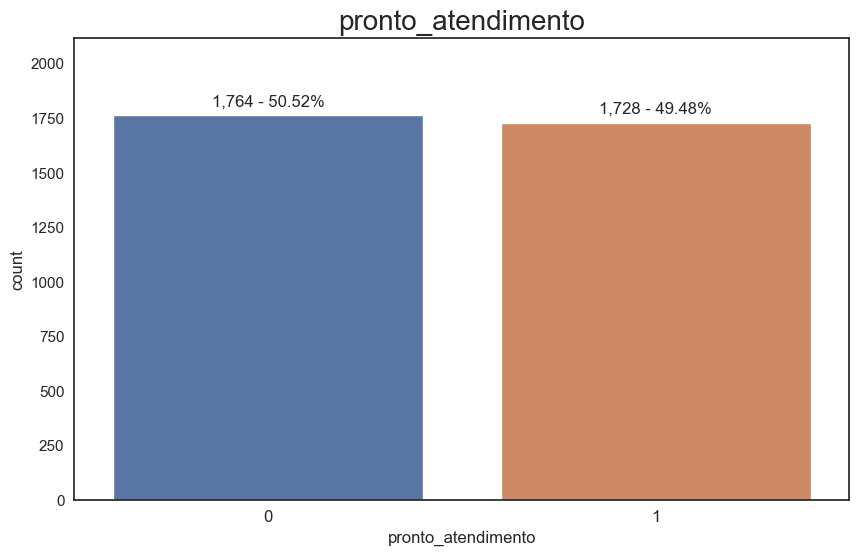

In [31]:
ax = plot(function='countplot', df=pdf, columns=[TARGET], title='', ncols=1, ha = 'center', xlabel_rotation = 0, rotation = 0)

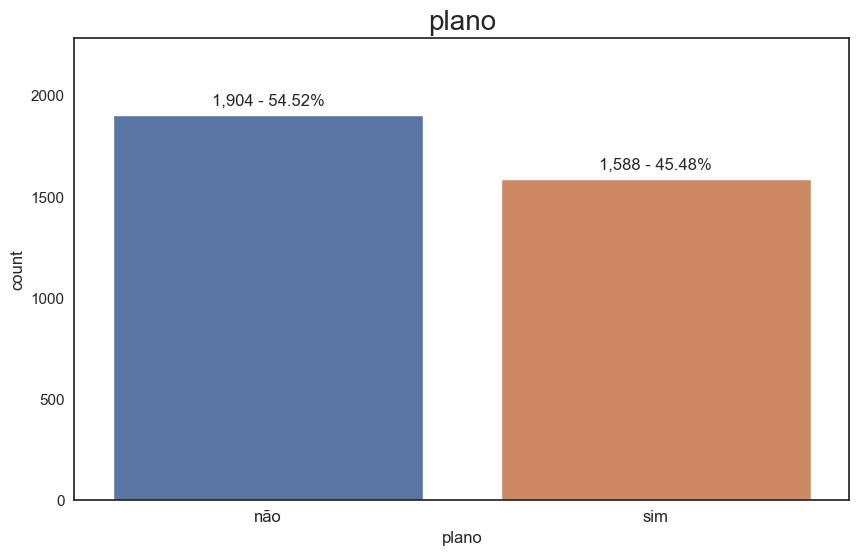

In [32]:
ax = plot(function='countplot', df=pdf, columns=['plano'], title='', ncols=1, ha = 'center', xlabel_rotation = 0, rotation = 0)

In [33]:
pdf['plano'].value_counts().index

Index(['não', 'sim'], dtype='object')

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot: title={'center': 'plano'}, xlabel='plano', ylabel='count'>)

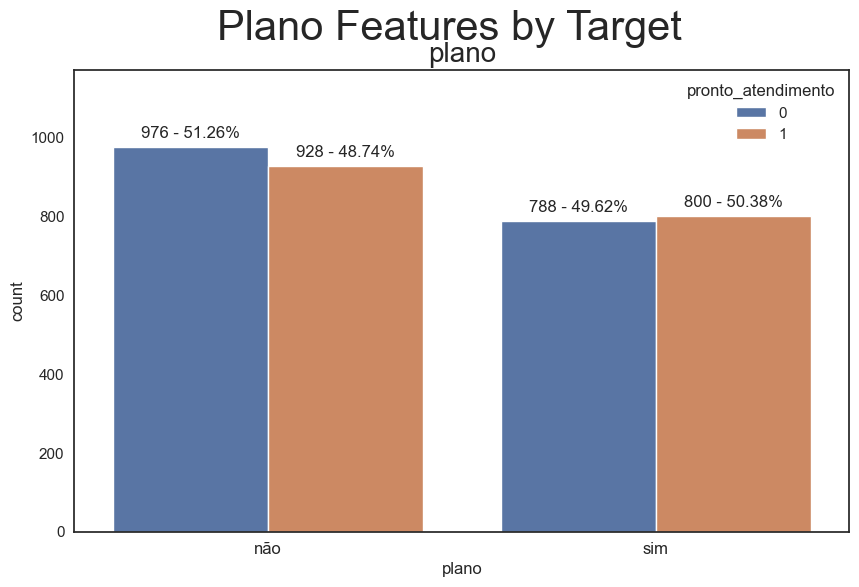

In [36]:
# plot(function='countplot', df=pdf, columns=['plano'], by = TARGET, title='', ncols=1)

plot(function='countplot',df=pdf, by = TARGET, columns=['plano'], title='Plano Features by Target', ncols = 1, ha = 'center', xlabel_rotation = 0, rotation = 0)

### Categorical Features

In [36]:
low_cardinality = pdf[categorical_features].columns[(pdf[categorical_features].nunique()<10).values].to_list()

In [ ]:
preprocessor.fit(X_train, y=y_train)

output_features = get_ct_feature_names(preprocessor)

X_train_preprocessed = pd.DataFrame(data = preprocessor.transform(X_train), columns = output_features)
X_test_preprocessed = pd.DataFrame(data = preprocessor.transform(X_test), columns = output_features)

print('X_train.shape: ', X_train_preprocessed.shape)
print('X_test.shape: ', X_test_preprocessed.shape)

ValueError: Shape of passed values is (2444, 1), indices imply (2444, 1177)

In [ ]:
plot(function='countplot',df=pdf[low_cardinality], columns=low_cardinality,title='Categorical Features - Countplot', ncols = 8, save_path='./figures/categorical_features_countplot.png', dpi = 300)

### Numeric Features

TypeError: Invalid object type at position 0

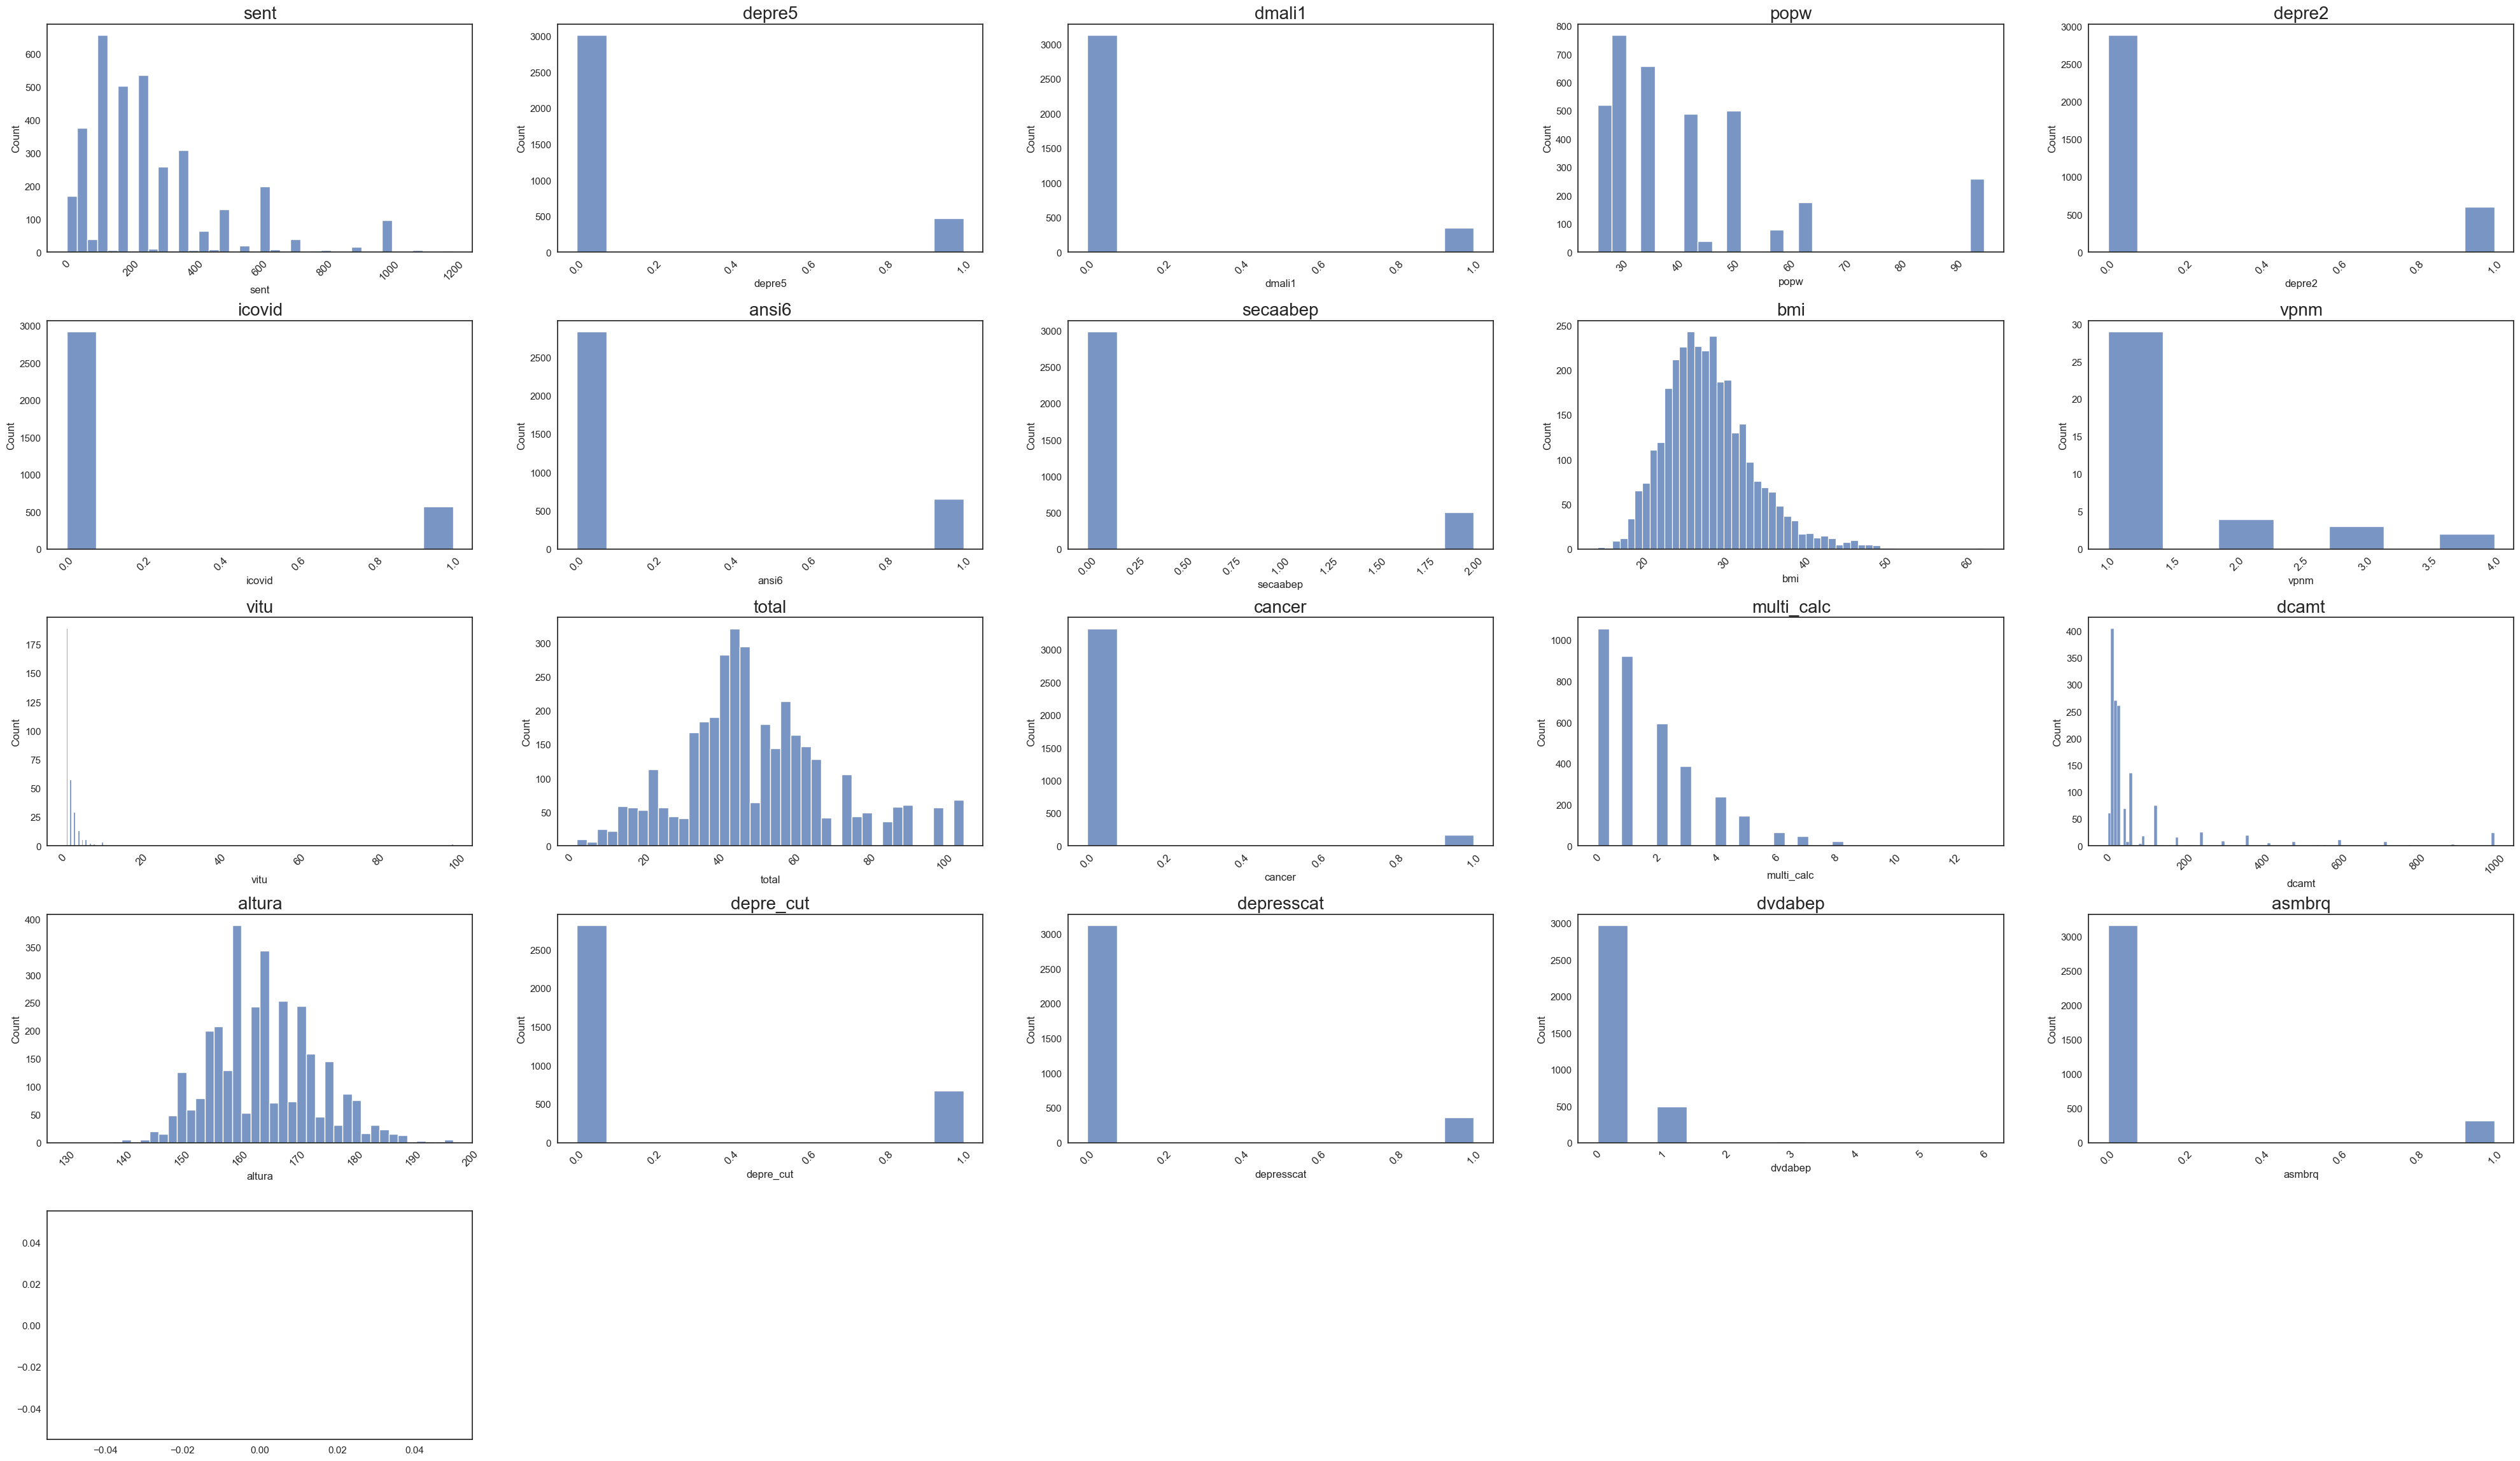

In [24]:
plot(function='histplot', df=pdf, columns=numeric_features, title='Numeric Features - Distplot', ncols=5, save_path='./figures/numeric_features_histogram.png', dpi = 200)

In [ ]:
plot(function='boxplot',df=pdf, columns=numeric_features,title='Numeric Features - Boxplot', ncols=5, save_path='./figures/numeric_features_boxplot.png', dpi = 200)

## Understanding the features and their relation with the target

##### Categorical Features

TypeError: Cannot broadcast np.ndarray with operand of type <class 'dict'>

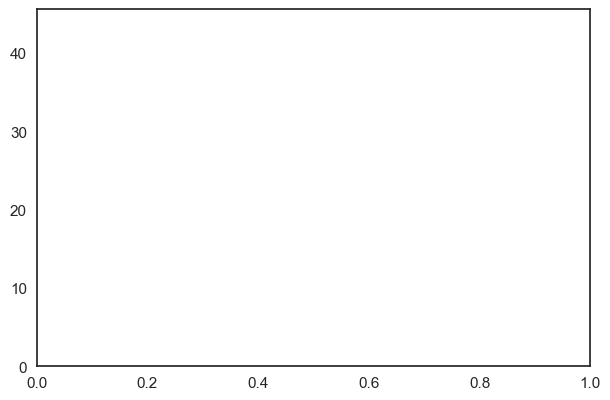

In [40]:
plot(function='countplot',df=pdf, by = TARGET, columns=categorical_features, title='Categorical Features by Target', ncols = 6, save_path='./figures/categorical_features_x_target.png', dpi = 200, ha = 'left')

##### Numeric Features

TypeError: Invalid object type at position 0

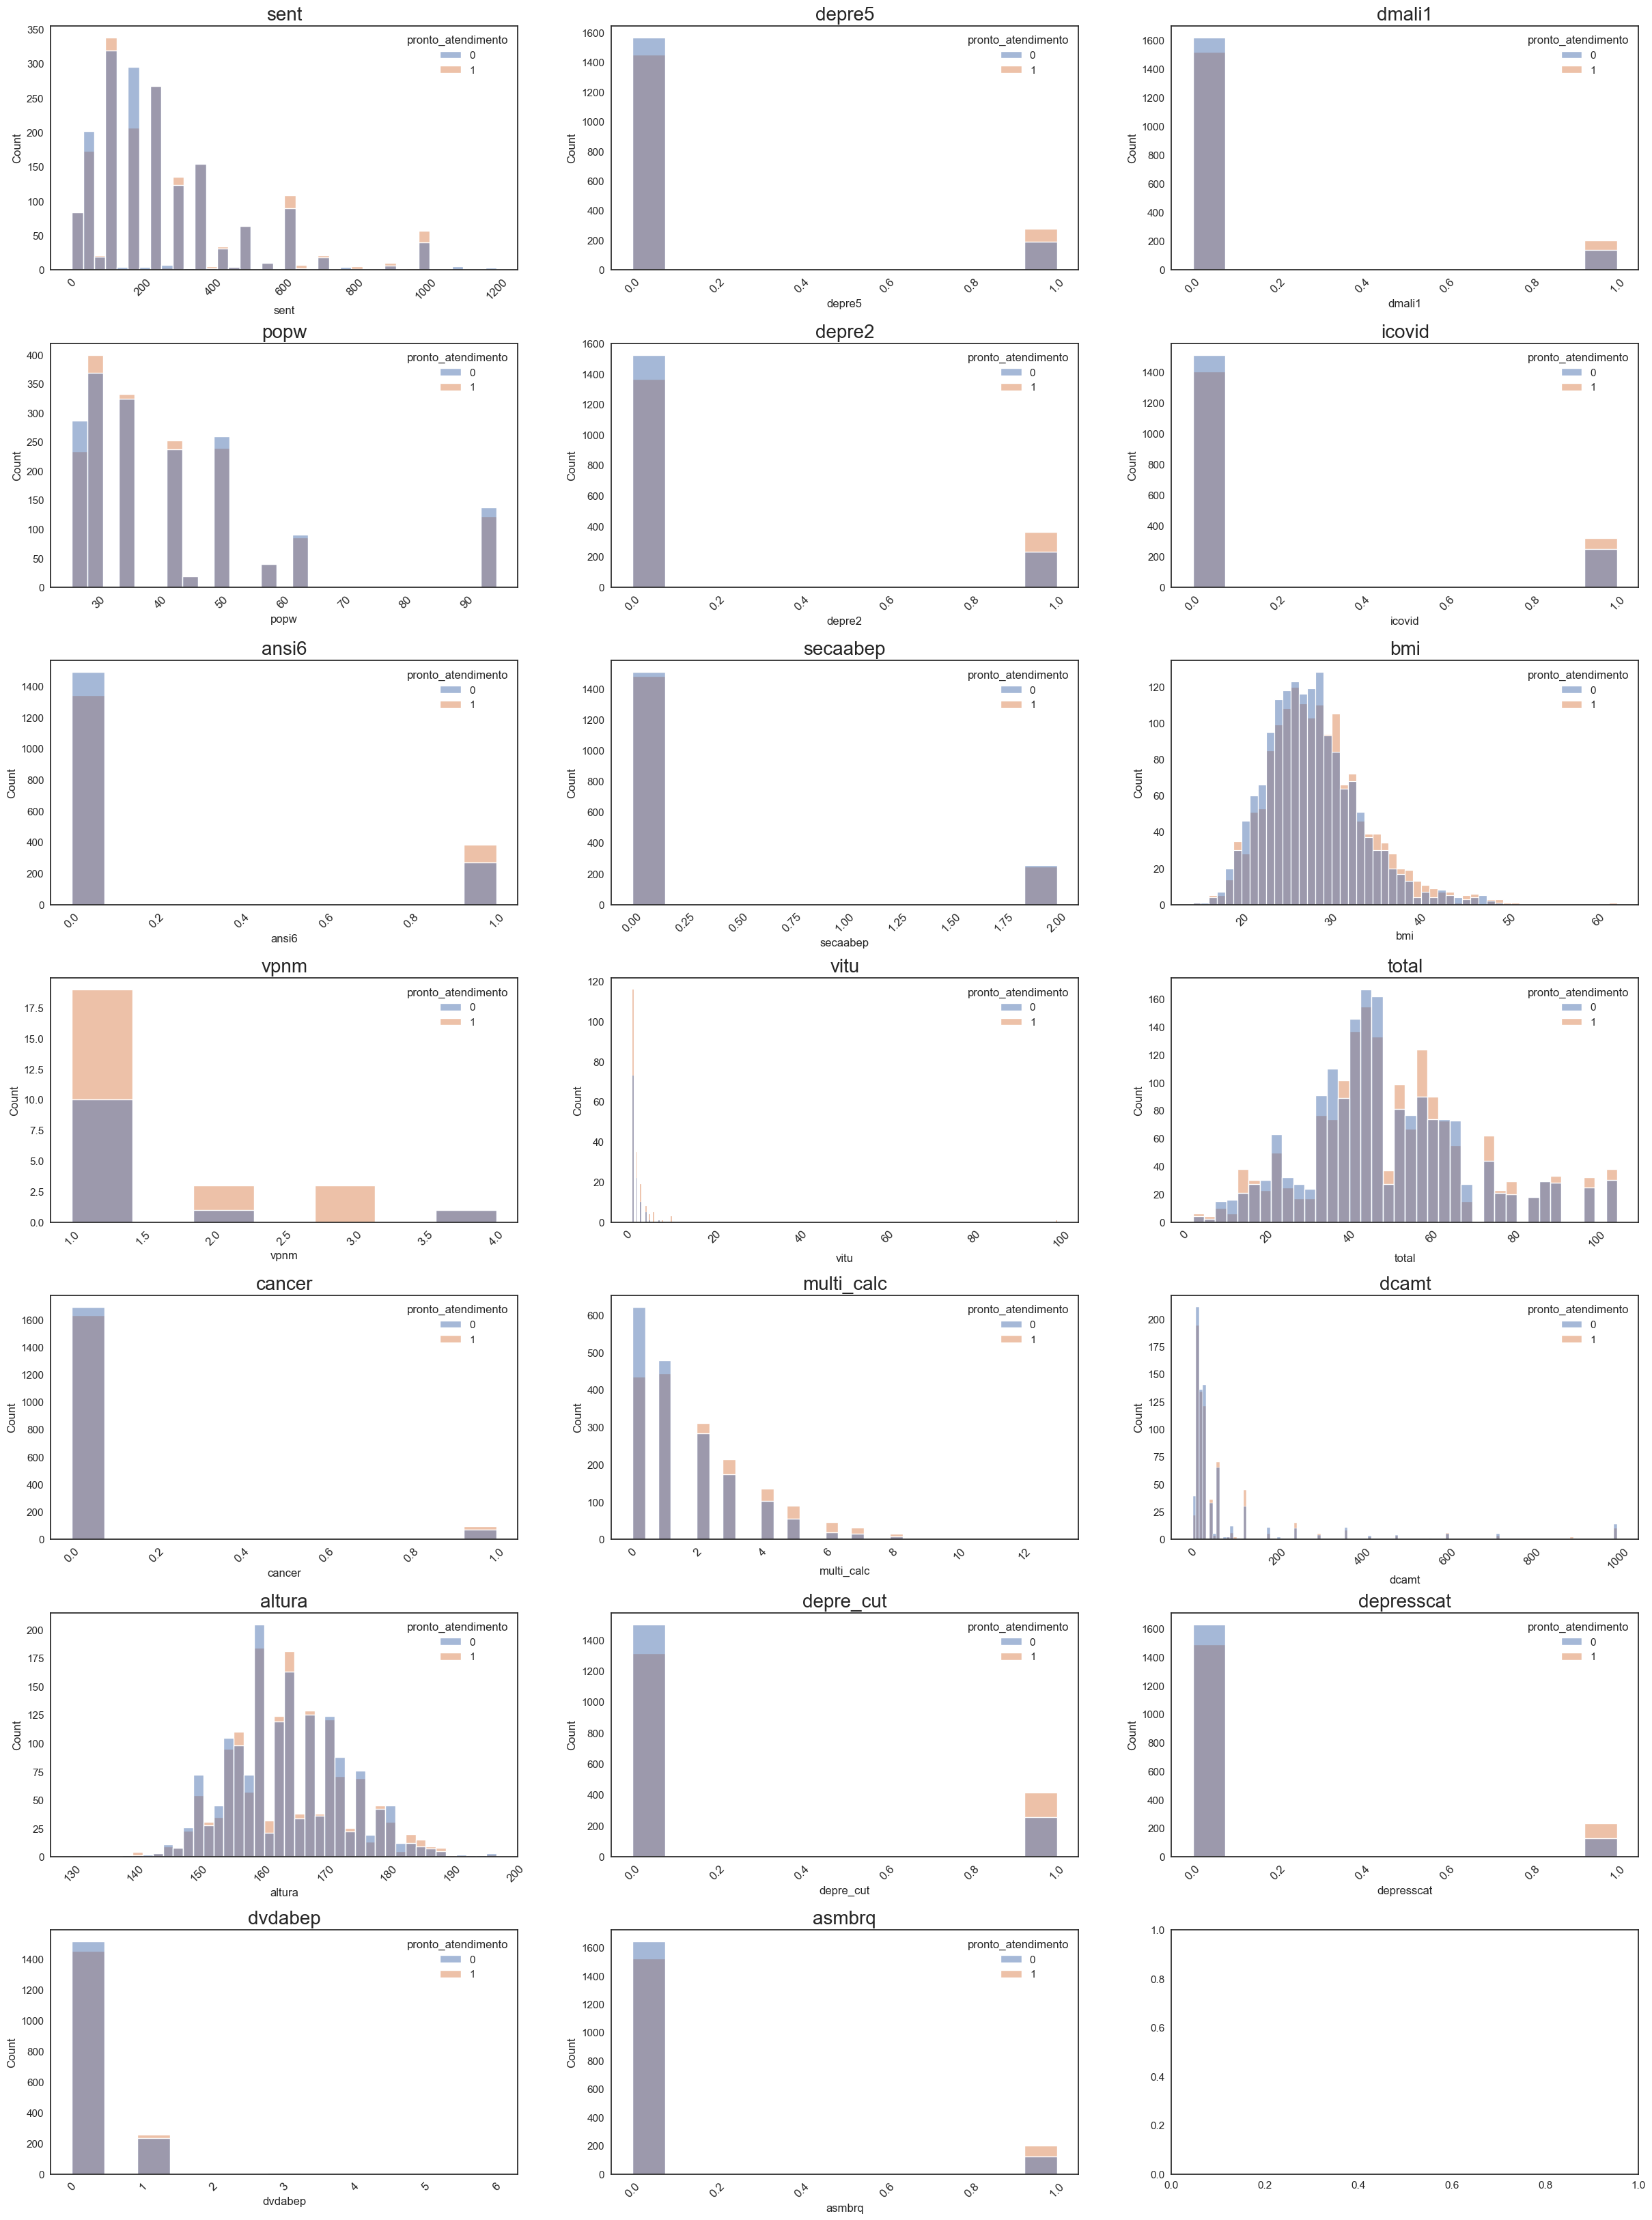

In [25]:
plot(function='histplot', df=pdf, by = TARGET, columns=numeric_features, title='Numeric Features - Distplot', ncols=3, save_path='./figures/numeric_features_x_target_histogram.png', dpi = 200)

In [26]:
plot(function='boxplot', df=pdf, by = TARGET, columns=numeric_features, cross_axis=1,orient='h',title='Numeric Features - Boxplot', ncols=3, save_path='./figures/numeric_features_x_target_histogram.png', dpi = 200)


(<Figure size 3000x23400 with 116 Axes>,
 <AxesSubplot: title={'center': 'lavaroupaabep'}, xlabel='pronto_atendimento', ylabel='lavaroupaabep'>)

In [ ]:
heat_map_corr(pdf, columns = categorical_features + numeric_features + [TARGET], title = "Pearson's Correlation", save_path = './figures/heat_map_corr.png', dpi = 200)

Several strong correlations are observed, however this will be adressed at the feature selection phase.

In [ ]:
#EDA using pandas-profiling
profile = ProfileReport(pdf, explorative=True)

#Saving results to a HTML file
profile.to_file("EDA Report.html")

# Feature Selection
The next step for creating the model is Feature Selection